<a href="https://colab.research.google.com/github/adexdams/ml-binary-classification/blob/main/Personal_Customer_Purchase_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **End-to-end Customer Purchase Classification Model**

# **End to end Retail Classification ML model**

By Adedamola Adediran

The model predicts by classification the likelihood of a customer to make a purchase. The approach to delivering the model would be as follows:
1. Problem Definition
2. Data Exploration (EDA)
4. Feature Engineering
5. ML Modelling Experiments
6. Evaluation
7. Conculsion


## **Introduction**


### **Problem Definition**

This is a binary classification ML model development task. The model should predict with fair accuracy (at least 60%), the likelihood of a customer purchasing a product (target variable) if they were recommended that product.



### **About the Data**

This dataset contains information on customer purchase behavior across various attributes, aiming to help data scientists and analysts understand the factors influencing purchase decisions. The dataset includes demographic information, purchasing habits, and other relevant features.

It was sourced from **Kaggle**: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset



### **About the Features**
* **Age:** Customer's age
* **Gender:** Customer's gender (0: Male, 1: Female)
* **Annual Income:** Annual income of the customer in dollars
* **Number of Purchases:** Total number of purchases made by the customer
* **Product Category:** Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
* **Time Spent on Website:** Time spent by the customer on the website in minutes
* **Loyalty Program:** Whether the customer is a member of the loyalty program (0: No, 1: Yes)
* **Discounts Availed:** Number of discounts availed by the customer (range: 0-5)
* **Purchase Status (Target  Variable):** Likelihood of the customer making a purchase (0: No, 1: Yes)

## **Importing Libraries & Data Files**

In [1]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
#Importing tech libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

%matplotlib inline

In [4]:
#Loading data file

cp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_purchase_data.csv')
cp_df.shape

(1500, 9)

## **Exploratory Data Analysis (or EDA)**

This section should answer the following questions:
1. What are the data types of each column?
2. What is the distribution of customers by age
3. Are the features correlated to one another
4. Do we have enough target variable blend?
5. Do we have enough data?
6. Are there null values in the dataset? And resolve it.


In [5]:
cp_df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [10]:
#Verifying number of data existing
cp_df.shape

(1500, 9)

Yes, we have enough data with 1,500 entries.

In [11]:
# Verifying the data types of each column
cp_df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [12]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [13]:
#Checking if there are null values
cp_df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

There are no null values in the dataset.

In [15]:
max_values = cp_df.max()

In [16]:
min_values = cp_df.min()

In [20]:
#Compare max & min values in a dataframe
pd.concat([max_values, min_values], axis=1, keys=['MaxValues', 'MinValues'])

,MaxValues,MinValues
Age,70.000000,18.000000
Gender,1.000000,0.000000
AnnualIncome,149785.176481,20001.512518
NumberOfPurchases,20.000000,0.000000
ProductCategory,4.000000,0.000000
TimeSpentOnWebsite,59.991105,1.037023
LoyaltyProgram,1.000000,0.000000
DiscountsAvailed,5.000000,0.000000
PurchaseStatus,1.000000,0.000000


In [32]:
cp_df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


### **Visualing the data**

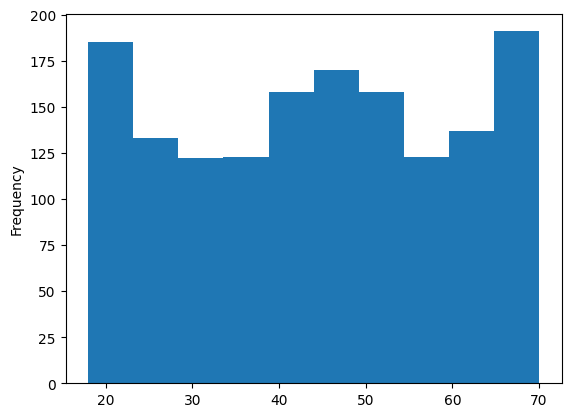

In [24]:
plt.figure
cp_df['Age'].plot.hist();

In [28]:
cp_df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [71]:
cp_df2 = cp_df.drop('AnnualIncome', axis=1)

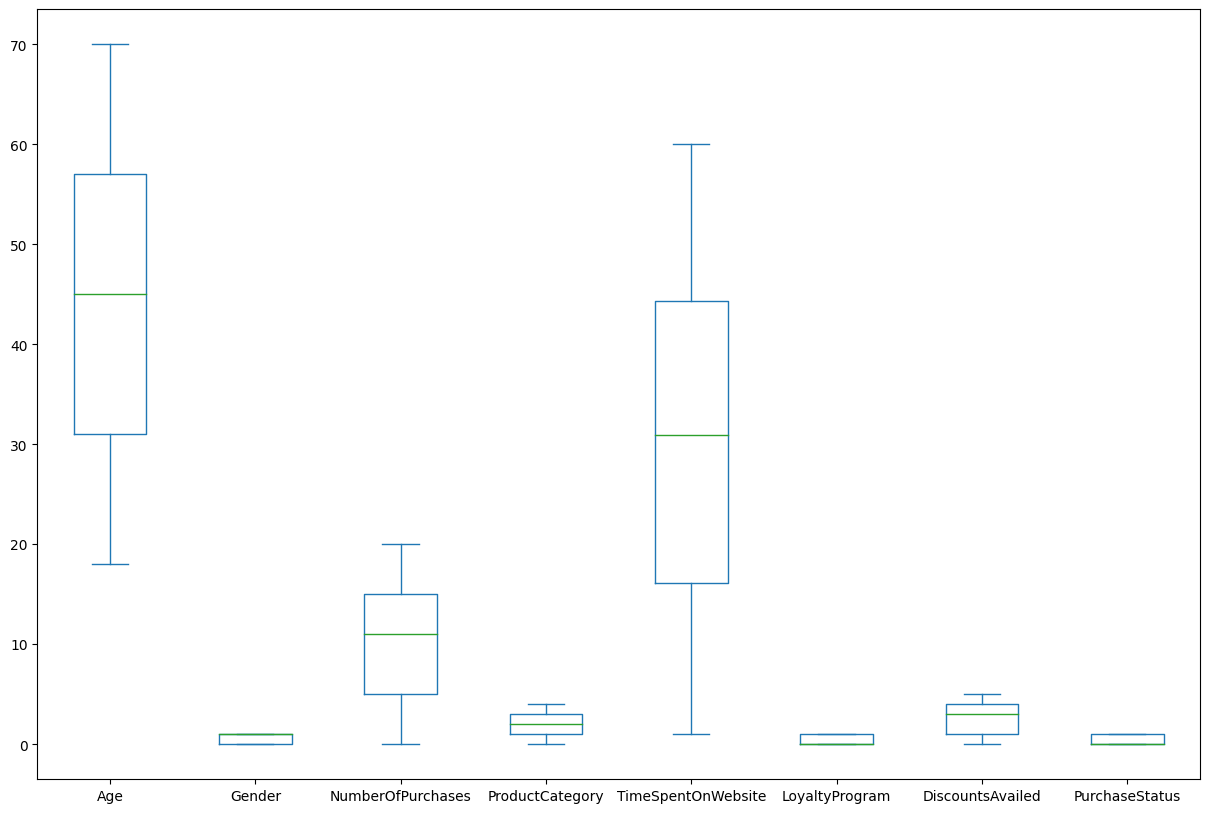

In [73]:
# Checking for outliers
cp_df2.plot.box(figsize=(15,10));

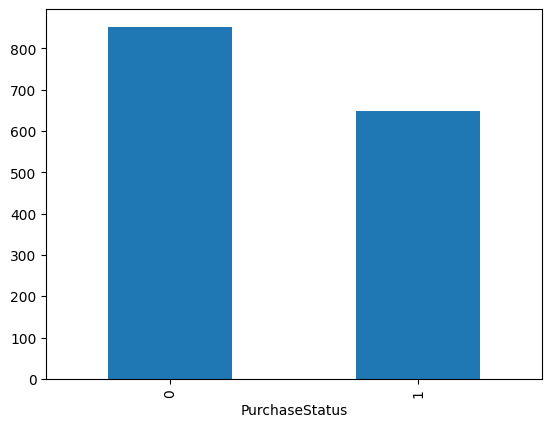

In [44]:
#Verifying split of the dataset
cp_df['PurchaseStatus'].value_counts().plot.bar();

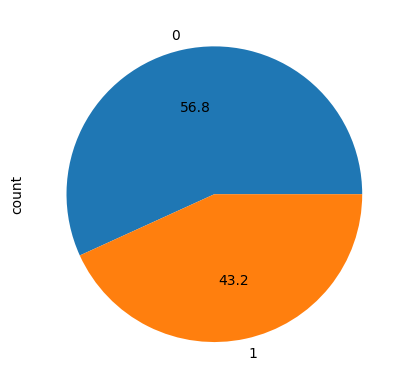

In [48]:
cp_df['PurchaseStatus'].value_counts().plot.pie(autopct="%.1f");

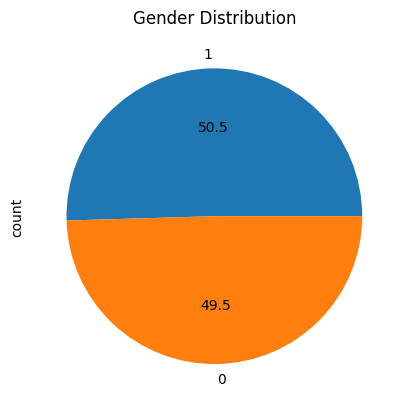

In [53]:
cp_df['Gender'].value_counts().plot.pie(autopct="%.1f", title='Gender Distribution');

### **Exploring Correlation of the columns**

In [55]:
import seaborn as sns

#Making a correlation matrix
corr_matrix = cp_df.corr()
corr_matrix

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
Age,1.000000,0.022055,0.016438,-0.038778,-0.020767,0.032309,-0.005980,0.004009,-0.255747
Gender,0.022055,1.000000,0.010054,0.001373,-0.028572,0.012814,0.033302,-0.056624,0.002627
AnnualIncome,0.016438,0.010054,1.000000,0.000276,0.032163,-0.001505,-0.045296,0.016393,0.188214
NumberOfPurchases,-0.038778,0.001373,0.000276,1.000000,0.006270,0.024644,0.055358,0.029581,0.222691
ProductCategory,-0.020767,-0.028572,0.032163,0.006270,1.000000,-0.011013,0.026680,0.034369,0.007346
TimeSpentOnWebsite,0.032309,0.012814,-0.001505,0.024644,-0.011013,1.000000,0.005965,0.001240,0.277112
LoyaltyProgram,-0.005980,0.033302,-0.045296,0.055358,0.026680,0.005965,1.000000,-0.048462,0.310838
DiscountsAvailed,0.004009,-0.056624,0.016393,0.029581,0.034369,0.001240,-0.048462,1.000000,0.303297
PurchaseStatus,-0.255747,0.002627,0.188214,0.222691,0.007346,0.277112,0.310838,0.303297,1.000000


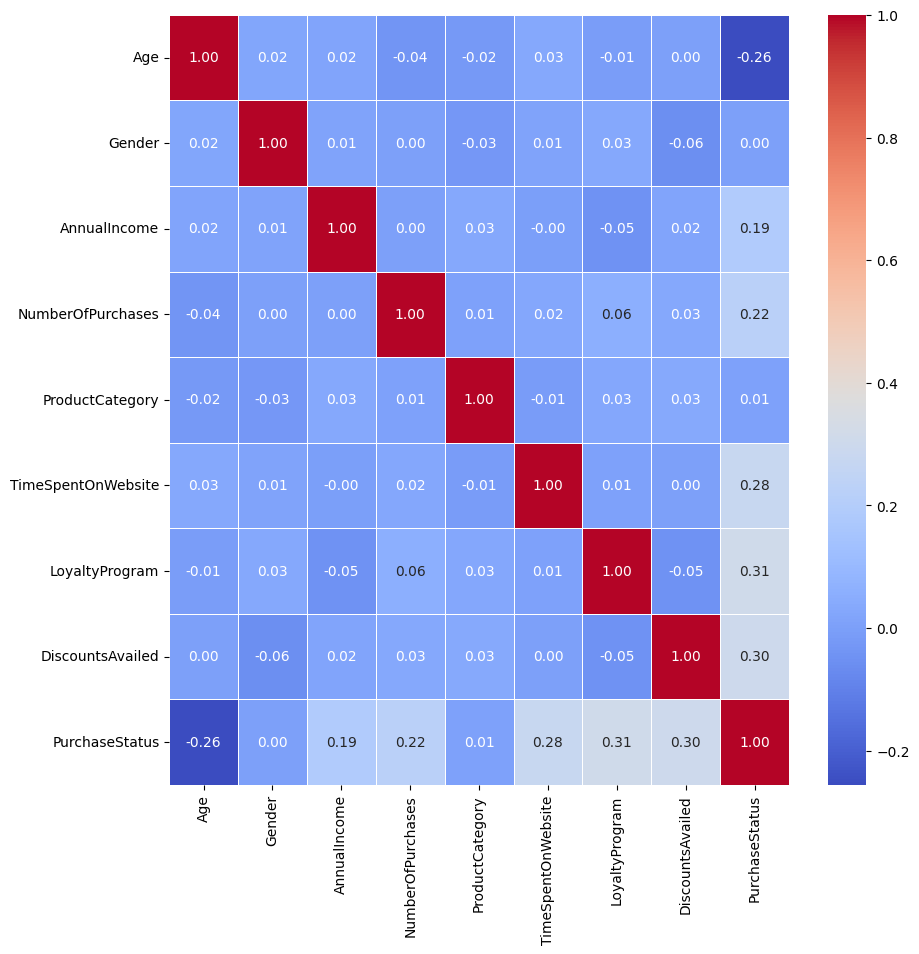

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap='coolwarm');

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


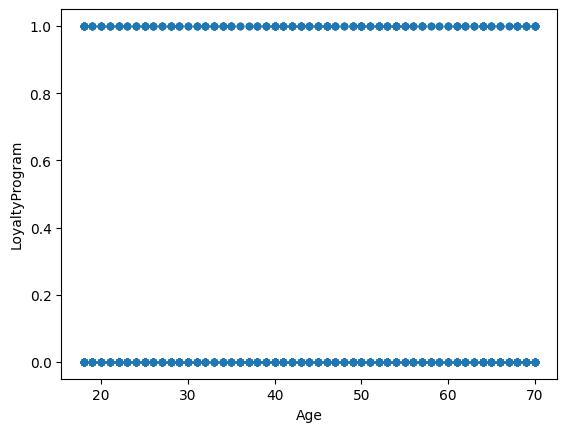

In [62]:
#Explore the correlation between PurchaseStatus and Age
cp_df.plot.scatter(x='Age', y='LoyaltyProgram', cmap='coolwarm');

## **Feature Engineering**

Found to be unneccessary since all the features have been converted to numericals already.

## **ML Model Experiments**

### Preparing the data for ML

In [65]:
cp_df.head(2)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0


In [68]:
#Split data into X and y
X = cp_df.drop('PurchaseStatus', axis=1)
y = cp_df['PurchaseStatus']

### Using Linear SVC Model

In [70]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
#Using Linear SVC model
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [76]:
clf_score = clf.score(X_test, y_test)
clf_score

0.5833333333333334

### Using Gaussian Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [78]:
gnb_score = gnb.score(X_test, y_test)
gnb_score

0.81

In [124]:
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_pred_gnb, y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       197
           1       0.68      0.84      0.75       103

    accuracy                           0.81       300
   macro avg       0.79      0.82      0.80       300
weighted avg       0.83      0.81      0.81       300



So far, GNB has a higher score of predicting the model than Linear SVC seems to show.

### Using KNeighbors Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
neigh_score = neigh.score(X_test, y_test)
neigh_score

0.6233333333333333

In [126]:
y_pred_neigh = neigh.predict(X_test)
print(classification_report(y_pred_neigh, y_test))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       177
           1       0.54      0.56      0.55       123

    accuracy                           0.62       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.63      0.62      0.62       300



Of the 3 models tried, GaussianNB still produces the highest score at 81%

### Using Random forest ensemble classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf = clf_rf.fit(X_train, y_train)

In [106]:
from sklearn.model_selection import cross_val_score

clf_rf_score = cross_val_score(clf_rf, X_train, y_train)
clf_rf_score.mean()

0.8625

In [125]:
y_pred_clf = clf_rf.predict(X_test)
print(classification_report(y_pred_clf, y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       186
           1       0.87      0.97      0.92       114

    accuracy                           0.93       300
   macro avg       0.92      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



We have a better score here Random Forest Classifier gives us 87.6%; much better than the previous 81% from GaussianNB.

### Visualizing model scores

In [109]:
import pandas as pd

#Visualising the results from the ML models
model_scores = [clf_score.mean(), gnb_score.mean(), neigh_score.mean(), clf_rf_score.mean()] # extract mean scores as a list
model_names = ['Linear SVC', 'Gaussian Naive Bayes', 'KNeighbors Classifier', 'Random Forest Classifier']

dfx = pd.DataFrame({'Model': model_names, 'Score': model_scores}) # create a dataframe with model names and scores

In [110]:
dfx

,Model,Score
0,Linear SVC,0.583333
1,Gaussian Naive Bayes,0.810000
2,KNeighbors Classifier,0.623333
3,Random Forest Classifier,0.862500


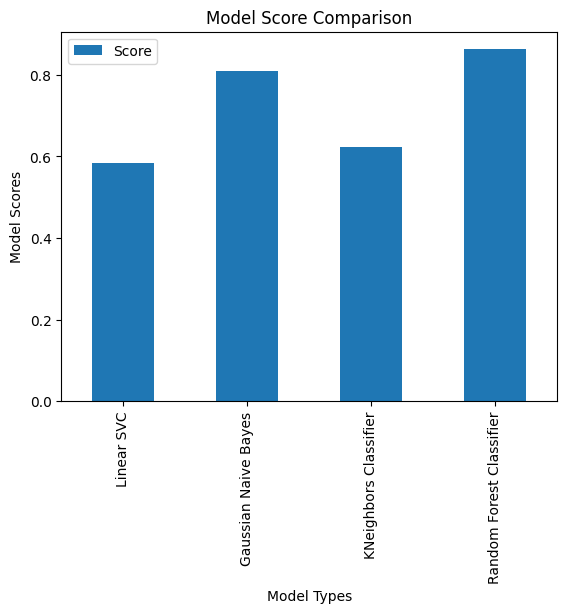

In [111]:
dfx.plot.bar(x='Model', y='Score', title= 'Model Score Comparison', xlabel='Model Types', ylabel='Model Scores');

The baseline model is the Random Forest Classifier for returning the highest score of 87.6%.

## **Evaluating the baseline model**

In [112]:
from sklearn.metrics import classification_report

#Predicting the model on test data
y_preds = clf_rf.predict(X_test)

#Drawing up a performance Evaluation report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       172
           1       0.97      0.87      0.92       128

    accuracy                           0.93       300
   macro avg       0.94      0.92      0.93       300
weighted avg       0.94      0.93      0.93       300



In [113]:
#Predicting the model on test data
y_preds = gnb.predict(X_test)

#Drawing up a performance Evaluation report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       172
           1       0.84      0.68      0.75       128

    accuracy                           0.81       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.81      0.81      0.81       300



## **Improving the Baseline ML Model**

In [114]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}

In [117]:
#Tunning the RandomForestClassifier
np.random.seed(42)

#Setup random hyperparameter search for RFC
from sklearn.model_selection import RandomizedSearchCV

# Find the best hyperparameters to tune the model
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid)
rs_rf.fit(X_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 150, 'max_leaf_nodes': 9, 'max_features': 'sqrt', 'max_depth': 9}


In [119]:
#Updating the model
model_update = RandomForestClassifier(n_estimators=150, max_leaf_nodes=9, max_features='sqrt', max_depth=9)
model_update.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=150)

In [120]:
#Predicting the model on test data
y_pred_update = model_update.predict(X_test)

#Drawing up a performance Evaluation report
print(classification_report(y_pred_update, y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       182
           1       0.89      0.97      0.93       118

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [129]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_pred_update, y_test)
cf_matrix

array([[168,  14],
       [  4, 114]])

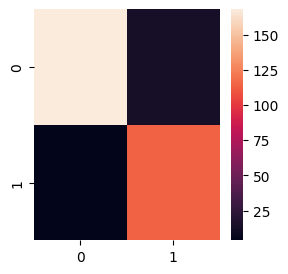

In [138]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(cf_matrix, annot=False, cbar=True)

## **Save the Model**

In [140]:
import pickle

filename = 'customer_purchase_classification_model_update.pkl'
pickle.dump(model_update, open(filename, 'wb'))

## **Conclusion**

The best classification  model for this task was found to be the RandomForestClassifier, which showed 93% accuracy score initially but after first hyperparameter tunning improved to 94% accuracy score.